In [1]:
from datetime import datetime, timedelta
import xarray as xr
from xhistogram.xarray import histogram
import pandas as pd

# We want to make an aggregate of the following set of forecst files, which overlap with 24 hours

In [2]:
url_base = 'https://thredds.met.no/thredds/dodsC/ww3_4km_archive_files/%Y/%m/%d/ww3_4km_%Y%m%dT00Z.nc'

In [6]:
def open_mfdataset_overlap(url_base, time_series, timedim='time'):
    urls = [t.strftime(url_base) for t in time_series]
    time_step = time_series[1] - time_series[0]
    print('Opening individual URLs...')
    datasets = [xr.open_dataset(u, chunks='auto').sel({timedim: slice(t, t+time_step-timedelta(seconds=1))})
                for u,t in zip(urls, time_series)]
    print('Concatenating...')    
    ds = xr.concat(datasets, dim=timedim,
                   compat='override', combine_attrs='override', join='override', coords='all')
    return ds

# Making an aggregate for 15 days

In [ ]:
%%time
ds = open_mfdataset_overlap(url_base, pd.date_range('2023-04-01', '2023-04-10'))
print(ds)

Opening individual URLs...


# Plotting time series of wind speed at a position

CPU times: user 103 ms, sys: 9.71 ms, total: 113 ms
Wall time: 2.4 s


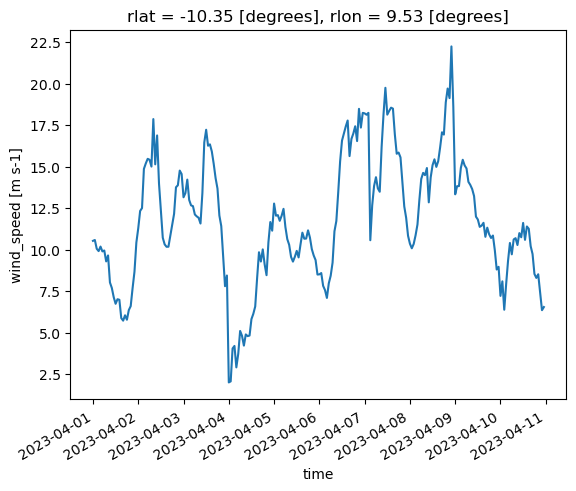

In [9]:
%%time
ds.isel({'rlon': 100, 'rlat': 100}).ff.plot()